In [1]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
import numpy as np
from tensorflow.data import Dataset

In [2]:
N_input = 15 # Number of samples
D = 1 # Number of features
input_t = Input(shape=(N_input,D))
N_output = 1 # The number of units is equal to the output dimension
output_t = LSTM(N_output,activation='relu')(input_t)
model = Model(inputs=input_t, outputs=output_t)
# print(model.summary())

In [3]:
def make_dataset(M,N_input,N_output):
    ''' 
    returns a numpy array with M data points, each of which has N_input samples
    in D dimensions, i.e., the feature dimension is (M,N_input,D)
    
    the values represnt samples starting at an arbitrary time t of the function sin(t),
    with subsequent samples moving forward in increments of dt = pi/10
    
    the labels are just a phase shifted sin wave, sin(t - pi/4)
    '''
    D = 1
    dt = np.pi/10
    phase = dt*N_input
    
    features = np.zeros((M,N_input,D))
    labels = np.zeros((M,N_output,D))
    for m in range(M):
        t0 = np.random.rand(1) * 2 * np.pi
        
        for n in range(N_input):
            for d in range(D):
                features[m,n,d] = np.sin(t0 + dt*n)
                
        for n in range(N_output):
            for d in range(D):
                labels[m,n,d] = np.sin(t0 + dt*n + phase)
                
    return features, labels
    
M =  10000
features,labels = make_dataset(M,N_input,N_output)

import matplotlib.pyplot as plt
# fig,ax=plt.subplots(M,1,figsize=(5,10))
# fig.patch.set_facecolor('w')
# ind = 1
# for feat,lab in zip(features,labels):
#     plt.subplot(M,1,ind)
#     plt.plot(feat,'-o')
#     plt.plot(len(feat),lab,'o')
#     ind = ind+1
    
print(features.shape)
print(labels.shape)
#model.predict(features)

(10000, 15, 1)
(10000, 1, 1)


In [4]:
print(features[0])
print(labels[0])

[[ 0.26333515]
 [-0.04766345]
 [-0.35399641]
 [-0.62567774]
 [-0.83611338]
 [-0.96470441]
 [-0.99886345]
 [-0.93524678]
 [-0.78008164]
 [-0.54855667]
 [-0.26333515]
 [ 0.04766345]
 [ 0.35399641]
 [ 0.62567774]
 [ 0.83611338]]
[[0.96470441]]


In [5]:
model.compile(
    optimizer='adam', 
    loss='mean_absolute_error', 
    metrics=['mean_absolute_error']
)

In [10]:
history = model.fit( features, labels, batch_size=25, epochs = 100)

import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_absolute_error: 0.6322
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_absolute_error: 0.6322
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_absolute_error: 0.6322
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_absolute_error: 0.6322
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_absolute_error: 0.6322
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_absolute_error: 0.6322
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_absolute_error: 0.6322
Epoch 8/100
 50/400 [==>...........................] - ETA: 0s - loss: 0.6380 - mean_absolute_error: 0.6380

KeyboardInterrupt: 

In [7]:
model.predict(features)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

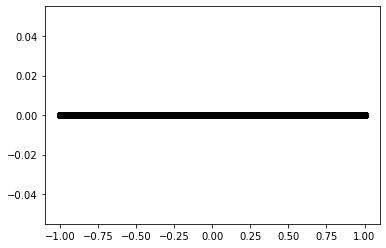

In [8]:

predictions = np.array(model ( features )).flatten()
labels_np = np.array(labels).flatten()
plt.subplots()
plt.plot( labels_np, predictions, 'ok')

In [9]:
print(labels[0])
print(predictions[0])

[[0.96470441]]
0.0
